In [3]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/Creditability.csv', index_col = 0)

In [4]:
df.head()

,Creditability,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Sex...Marital.Status,Guarantors,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
497,1,3,6,2,3,2108,1,3,2,3,1,2,1,29,2,1,1,1,1,1,1
756,0,1,15,1,4,950,1,4,4,2,1,3,3,33,2,1,2,1,2,1,1
580,0,1,42,2,3,7174,4,3,4,1,1,3,3,30,2,2,1,1,1,2,1
833,0,3,36,3,4,7980,4,1,4,2,1,4,3,27,2,1,2,1,1,2,1
602,1,3,24,3,2,2028,1,3,2,2,1,2,2,30,2,2,2,1,1,1,1


In [6]:
df.isna().sum()

Creditability                        0
Account.Balance                      0
Duration.of.Credit..month.           0
Payment.Status.of.Previous.Credit    0
Purpose                              0
Credit.Amount                        0
Value.Savings.Stocks                 0
Length.of.current.employment         0
Instalment.per.cent                  0
Sex...Marital.Status                 0
Guarantors                           0
Duration.in.Current.address          0
Most.valuable.available.asset        0
Age..years.                          0
Concurrent.Credits                   0
Type.of.apartment                    0
No.of.Credits.at.this.Bank           0
Occupation                           0
No.of.dependents                     0
Telephone                            0
Foreign.Worker                       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 497 to 385
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      500 non-null    int64
 1   Account.Balance                    500 non-null    int64
 2   Duration.of.Credit..month.         500 non-null    int64
 3   Payment.Status.of.Previous.Credit  500 non-null    int64
 4   Purpose                            500 non-null    int64
 5   Credit.Amount                      500 non-null    int64
 6   Value.Savings.Stocks               500 non-null    int64
 7   Length.of.current.employment       500 non-null    int64
 8   Instalment.per.cent                500 non-null    int64
 9   Sex...Marital.Status               500 non-null    int64
 10  Guarantors                         500 non-null    int64
 11  Duration.in.Current.address        500 non-null    int64
 12  Most.valuable.availa

In [8]:
y = df.iloc[:,0]
X = df.iloc[:,1:]

In [9]:
y.head()

497    1
756    0
580    0
833    0
602    1
Name: Creditability, dtype: int64

In [10]:
X.head()

,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Sex...Marital.Status,Guarantors,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
497,3,6,2,3,2108,1,3,2,3,1,2,1,29,2,1,1,1,1,1,1
756,1,15,1,4,950,1,4,4,2,1,3,3,33,2,1,2,1,2,1,1
580,1,42,2,3,7174,4,3,4,1,1,3,3,30,2,2,1,1,1,2,1
833,3,36,3,4,7980,4,1,4,2,1,4,3,27,2,1,2,1,1,2,1
602,3,24,3,2,2028,1,3,2,2,1,2,2,30,2,2,2,1,1,1,1


In [11]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [12]:
train_X.shape

(400, 20)

In [13]:
test_X.shape

(100, 20)

In [14]:
train_y.shape

(400,)

In [15]:
test_y.shape

(100,)

In [18]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(max_iter=1000)
clf1.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier()
clf2.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
pred_y1 = clf1.predict(test_X)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred_y1)

0.71

In [22]:
pred_y2 = clf2.predict(test_X)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred_y2)

0.7

In [25]:
from sklearn.metrics import confusion_matrix
print(clf1.classes_)
confusion_matrix(test_y, pred_y1)

[0 1]


array([[10, 21],
       [ 8, 61]])

In [26]:
from sklearn.metrics import confusion_matrix
print(clf2.classes_)
confusion_matrix(test_y, pred_y2)

[0 1]


array([[ 7, 24],
       [ 6, 63]])

In [31]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, threshold1 = roc_curve(test_y, clf1.predict_proba(test_X)[:,1])
auc(fpr1, tpr1)

0.6390836839644694

In [33]:
from sklearn.metrics import roc_curve, auc
fpr2, tpr2, threshold2 = roc_curve(test_y, clf2.predict_proba(test_X)[:,1])
auc(fpr2, tpr2)

0.7531556802244039

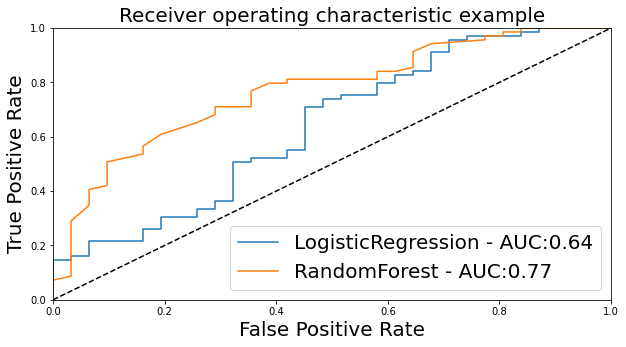

In [36]:
from sklearn.metrics import auc
from matplotlib import pyplot as plt

plt.figure(figsize= [10,5])

for clf, title in zip([clf1,clf2], ['LogisticRegression', 'RandomForest']):
  probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
  fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
  plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
  #plt.plot(fpr, tpr, label='%s'%(title) )

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

## Feature Selection

In [37]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/python_for_data_science/master/Data/customer_behavior.csv')

In [39]:
df.head()

,bachelor,gender,age,salary,purchased
0,1,0,23,1500,0
1,1,0,30,2500,1
2,1,0,32,1800,1
3,1,0,25,1700,0
4,1,0,27,1200,0


In [40]:
from sklearn.feature_selection import VarianceThreshold
X = df[['bachelor','gender', 'age', 'salary']]

In [41]:
X.head()

,bachelor,gender,age,salary
0,1,0,23,1500
1,1,0,30,2500
2,1,0,32,1800
3,1,0,25,1700
4,1,0,27,1200


In [42]:
sel = VarianceThreshold()

In [43]:
X_val = sel.fit_transform(X)

In [46]:
X_val[0:3,:]

array([[   0,   23, 1500],
       [   0,   30, 2500],
       [   0,   32, 1800]])

In [47]:
sel.get_support()

array([False,  True,  True,  True])

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df[['bachelor','gender', 'age', 'salary']]
y = df['purchased'].values

In [49]:
clf = SelectKBest(chi2, k=2)

In [50]:
clf.fit(X,y)
print(clf.scores_)

[   0.            0.            4.48447205 2766.66666667]


In [52]:
X_new = clf.fit_transform(X,y)
X_new

array([[  23, 1500],
       [  30, 2500],
       [  32, 1800],
       [  25, 1700],
       [  27, 1200],
       [  26, 1000],
       [  35, 3500],
       [  23, 2000],
       [  22, 1800],
       [  21, 1700],
       [  38, 5000],
       [  20, 1200]])

In [72]:
from sklearn.feature_selection import VarianceThreshold
X = df[['bachelor','gender', 'age', 'salary']]
sel = VarianceThreshold()
X_val = sel.fit_transform(X)
sel.get_support()
names = X.loc[:,sel.get_support()].columns 
names
#names = df.columns[sel.get_support()]

Index(['gender', 'age', 'salary'], dtype='object')

In [73]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

clf = SVC(kernel='linear')
rfe = RFE(clf, n_features_to_select=1)

rfe.fit(X_val,y)



RFE(estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                  coef0=0.0, decision_function_shape='ovr', degree=3,
                  gamma='scale', kernel='linear', max_iter=-1,
                  probability=False, random_state=None, shrinking=True,
                  tol=0.001, verbose=False),
    n_features_to_select=1, step=1, verbose=0)

In [74]:
for x in rfe.ranking_:
    print(names[x-1], rfe.ranking_[x-1])

salary 1
age 2
gender 3


In [75]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

clf = SVC(kernel='linear')
rfe = RFE(clf, n_features_to_select=2)

rfe.fit(X_val,y)

RFE(estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                  coef0=0.0, decision_function_shape='ovr', degree=3,
                  gamma='scale', kernel='linear', max_iter=-1,
                  probability=False, random_state=None, shrinking=True,
                  tol=0.001, verbose=False),
    n_features_to_select=2, step=1, verbose=0)

In [77]:
rfe.ranking_

array([2, 1, 1])

In [79]:
from sklearn.feature_selection import RFECV
selector = RFECV(clf, step=1, cv=5)

In [83]:
selector.fit(X_val,y)

RFECV(cv=5,
      estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                    coef0=0.0, decision_function_shape='ovr', degree=3,
                    gamma='scale', kernel='linear', max_iter=-1,
                    probability=False, random_state=None, shrinking=True,
                    tol=0.001, verbose=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [84]:
selector.get_support()

array([False, False,  True])

In [85]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10,random_state=123)

In [86]:
clf.fit(X_val, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [87]:
names, clf.feature_importances_
for feature in zip(names, clf.feature_importances_):
  print(feature)


('gender', 0.0933015873015873)
('age', 0.39391203703703703)
('salary', 0.5127863756613757)


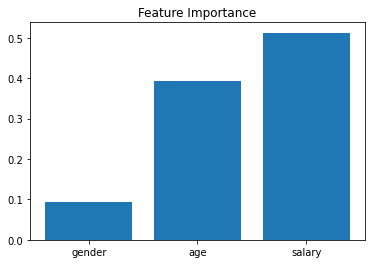

In [88]:
import matplotlib.pyplot as plt
plt.title('Feature Importance')
plt.bar(range(0, len(names)), clf.feature_importances_)
plt.xticks(range(0,len(names)), names)
plt.show()

## Feature Extraction

In [90]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

In [91]:
X[0:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [93]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [95]:
X_reduced[0:3]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943]])

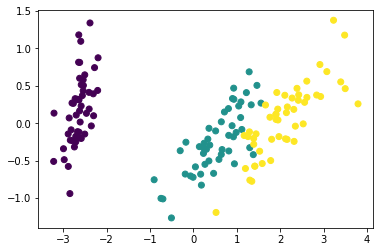

In [97]:
from matplotlib import pyplot as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=iris.target)
plt.show()

In [98]:
for component in pca.components_:
  print(" + ".join("%.3f x %s" % (value, name) for value, name in zip(component, iris.feature_names))) 

0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


In [99]:
pca.explained_variance_

array([4.22824171, 0.24267075])

In [101]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_reduced[:,[0]], iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
pred_y = clf.predict(X_reduced[:,[0]])

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.target, pred_y)

0.94

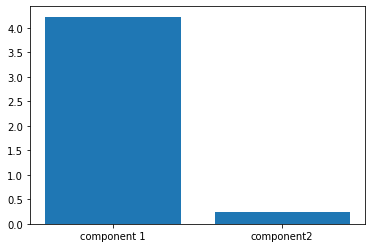

In [104]:
plt.bar(range(0,2), pca.explained_variance_)
plt.xticks(range(0,2), ['component 1', 'component2'])
plt.show()

In [105]:
X[0:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [106]:
X.shape

(150, 4)

In [107]:
from scipy.linalg import svd

U, S, V = svd(X, full_matrices=False)

U.shape, S.shape, V.shape


((150, 4), (4,), (4, 4))

In [108]:
X[0:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [109]:
U[0:3]

array([[-0.06161685,  0.12961144,  0.0021386 ,  0.00163819],
       [-0.05807094,  0.11101978,  0.07067239,  0.05175696],
       [-0.05676305,  0.11796647,  0.00434255,  0.00955702]])

In [110]:
S[0:3]

array([95.95991387, 17.76103366,  3.46093093])

In [111]:
V[:3]

array([[-0.75110816, -0.38008617, -0.51300886, -0.16790754],
       [ 0.2841749 ,  0.5467445 , -0.70866455, -0.34367081],
       [ 0.50215472, -0.67524332, -0.05916621, -0.53701625]])

In [113]:
import numpy as np
X2 = np.dot(np.dot(U,np.diag(S)),V)

In [114]:
X2[0:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [116]:
X[0:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [117]:
  150 * 4

600

In [118]:
150 * 4 + 4 * 4 + 4* 4

632

In [119]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(2)
X = svd.fit_transform(iris.data)

In [120]:
X.shape

(150, 2)

In [121]:
150 * 2

300

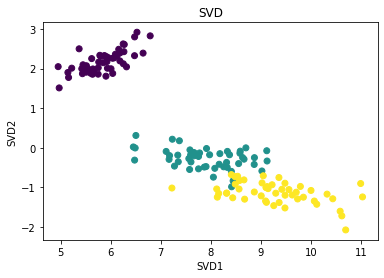

In [122]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=iris.target)
plt.xlabel('SVD1')
plt.ylabel('SVD2')
plt.title('SVD')
plt.show()

## Lending Club
- https://drive.google.com/open?id=1sf5jtUA7UKc56DufVZO8QW0HteOd_Swo

In [123]:
! gdown https://drive.google.com/uc?id=1sf5jtUA7UKc56DufVZO8QW0HteOd_Swo

Downloading...
From: https://drive.google.com/uc?id=1sf5jtUA7UKc56DufVZO8QW0HteOd_Swo
To: /content/LoanStats3b.csv.zip
36.6MB [00:00, 100MB/s] 


In [124]:
! unzip LoanStats3b.csv.zip

Archive:  LoanStats3b.csv.zip
  inflating: LoanStats3b.csv         


### 讀取資料

In [156]:
import pandas as pd
dataset = pd.read_csv('LoanStats3b.csv', skiprows=[0])
dataset.info()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,47,123,124,125,128,129,130,133) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188183 entries, 0 to 188182
Columns: 145 entries, id to settlement_term
dtypes: float64(108), object(37)
memory usage: 208.2+ MB


In [157]:
len(dataset.columns)

145

### 資料預處理

In [158]:
dataset.isna().sum()

id                       188181
member_id                188183
loan_amnt                     2
funded_amnt                   2
funded_amnt_inv               2
                          ...  
settlement_status        186132
settlement_date          186132
settlement_amount        186132
settlement_percentage    186132
settlement_term          186132
Length: 145, dtype: int64

In [159]:
dataset['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Late (31-120 days)', 'Current',
       'In Grace Period', nan], dtype=object)

In [160]:
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,12000.0,12000.0,12000.0,36 months,7.62%,373.94,A,A3,Systems Engineer,3 years,MORTGAGE,96500.0,Not Verified,Dec-2013,Fully Paid,n,NaN,Borrower added on 12/31/13 > Bought a new ho...,debt_consolidation,Debt Consolidation and Credit Transfer,782xx,TX,12.61,0.0,Sep-2003,0.0,NaN,NaN,17.0,0.0,13248.0,55.7%,30.0,f,0.0,0.0,13397.539998,13397.54,...,0.0,0.0,233004.0,46738.0,14800.0,53404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,27050.0,27050.0,27050.0,36 months,10.99%,885.46,B,B2,Team Leadern Customer Ops & Systems,10+ years,OWN,55000.0,Verified,Dec-2013,Fully Paid,n,NaN,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,Debt Consolidation,481xx,MI,22.87,0.0,Oct-1986,0.0,NaN,NaN,14.0,0.0,36638.0,61.2%,27.0,w,0.0,0.0,31752.530000,31752.53,...,0.0,0.0,138554.0,70186.0,35700.0,33054.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,12000.0,12000.0,12000.0,36 months,11.99%,398.52,B,B3,LTC,10+ years,MORTGAGE,130000.0,Source Verified,Dec-2013,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,809xx,CO,13.03,0.0,Nov-1997,1.0,NaN,NaN,9.0,0.0,10805.0,67%,19.0,f,0.0,0.0,14346.479050,14346.48,...,0.0,0.0,365874.0,44327.0,10700.0,57674.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,28000.0,28000.0,28000.0,36 months,7.62%,872.52,A,A3,Area Sales Manager,5 years,MORTGAGE,325000.0,Source Verified,Dec-2013,Fully Paid,n,NaN,NaN,debt_consolidation,Pay off other Installment loan,945xx,CA,18.55,0.0,Nov-1994,1.0,NaN,NaN,15.0,0.0,29581.0,54.6%,31.0,w,0.0,0.0,29150.980000,29150.98,...,0.0,0.0,850886.0,199739.0,42200.0,196686.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,12000.0,12000.0,12000.0,36 months,10.99%,392.81,B,B2,Project Manager,4 years,RENT,60000.0,Not Verified,Dec-2013,Fully Paid,n,NaN,Borrower added on 12/31/13 > I would like to...,debt_consolidation,No Regrets,281xx,NC,4.62,0.0,Dec-2009,1.0,NaN,NaN,15.0,0.0,7137.0,24%,18.0,f,0.0,0.0,13988.609996,13988.61,...,0.0,0.0,29700.0,7137.0,18100.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
np.where((dataset.isna().sum() / len(dataset)) > 0.9)

(array([  0,   1,  18,  29,  47,  53,  54,  55,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  71,  72,  73, 111, 112, 113, 114,
        115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 139, 140, 141, 142, 143,
        144]),)

In [162]:
dataset = dataset.iloc[:,2:111]
empty_cols = [i for i in range(45,72)]
dataset = dataset.drop(dataset.columns[empty_cols],axis=1)

In [163]:
#dataset.info()

In [164]:
np.where((dataset.isna().sum() / len(dataset)) > 0.9)

(array([16, 27]),)

In [165]:
dataset = dataset[dataset['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [166]:
dataset.isna().sum().sort_values(ascending= False)

url                               188171
mths_since_last_record            170698
mths_since_recent_bc_dlq          151423
mths_since_recent_revol_delinq    133728
mths_since_last_delinq            107568
                                   ...  
revol_bal                              0
pub_rec                                0
open_acc                               0
inq_last_6mths                         0
loan_amnt                              0
Length: 82, dtype: int64

In [167]:
del_col_names = ["delinq_2yrs", "last_pymnt_d", "chargeoff_within_12_mths","delinq_amnt","emp_title",
"term", "emp_title", "pymnt_plan","purpose","title", "zip_code", "verification_status", "dti","earliest_cr_line",
"initial_list_status", "out_prncp",
"pymnt_plan", "num_tl_90g_dpd_24m", "num_tl_30dpd", "num_tl_120dpd_2m",
"num_accts_ever_120_pd", "delinq_amnt",
"chargeoff_within_12_mths", "total_rec_late_fee", "out_prncp_inv", "issue_d"]

In [168]:
dataset = dataset.drop(labels = del_col_names, axis = 1)

In [169]:
dataset.isna().sum().sort_values(ascending= False)

url                               188171
mths_since_last_record            170698
mths_since_recent_bc_dlq          151423
mths_since_recent_revol_delinq    133728
mths_since_last_delinq            107568
desc                              106697
mo_sin_old_il_acct                 33872
pct_tl_nvr_dlq                     27894
mths_since_recent_inq              27867
avg_cur_bal                        27747
mo_sin_old_rev_tl_op               27742
mo_sin_rcnt_rev_tl_op              27742
mo_sin_rcnt_tl                     27741
num_actv_bc_tl                     27741
num_actv_rev_tl                    27741
total_il_high_credit_limit         27741
num_bc_tl                          27741
num_il_tl                          27741
num_op_rev_tl                      27741
num_rev_accts                      27741
num_rev_tl_bal_gt_0                27741
num_tl_op_past_12m                 27741
tot_hi_cred_lim                    27741
num_sats                           16055
num_bc_sats     

In [170]:
features = ['funded_amnt','emp_length','annual_inc','home_ownership','grade',
            "last_pymnt_amnt", "mort_acc", "pub_rec", "int_rate", "open_acc","num_actv_rev_tl",
            "mo_sin_rcnt_rev_tl_op","mo_sin_old_rev_tl_op","bc_util","bc_open_to_buy",
            "avg_cur_bal","acc_open_past_24mths",'loan_status'] #'sub_grade' #selecting final features #'addr_state''tax_liens',
Final_data = dataset[features]

In [171]:
Final_data.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,12000.0,3 years,96500.0,MORTGAGE,A,2927.22,1.0,0.0,7.62%,17.0,5.0,10.0,118.0,83.5,2441.0,11783.0,4.0,Fully Paid
1,27050.0,10+ years,55000.0,OWN,B,6074.19,4.0,0.0,10.99%,14.0,4.0,16.0,326.0,53.9,16473.0,9570.0,3.0,Fully Paid
2,12000.0,10+ years,130000.0,MORTGAGE,B,398.28,3.0,0.0,11.99%,9.0,5.0,4.0,193.0,93.0,3567.0,36362.0,4.0,Fully Paid
3,28000.0,5 years,325000.0,MORTGAGE,A,23915.86,5.0,0.0,7.62%,15.0,5.0,5.0,229.0,67.1,13901.0,53306.0,6.0,Fully Paid
4,12000.0,4 years,60000.0,RENT,B,3775.55,0.0,0.0,10.99%,15.0,7.0,1.0,48.0,15.9,15216.0,476.0,8.0,Fully Paid


In [172]:
Final_data.isna().sum()

funded_amnt                  0
emp_length                7887
annual_inc                   0
home_ownership               0
grade                        0
last_pymnt_amnt              0
mort_acc                  7495
pub_rec                      0
int_rate                     0
open_acc                     0
num_actv_rev_tl          27741
mo_sin_rcnt_rev_tl_op    27742
mo_sin_old_rev_tl_op     27742
bc_util                   9112
bc_open_to_buy            9025
avg_cur_bal              27747
acc_open_past_24mths      7495
loan_status                  0
dtype: int64

In [173]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188171 entries, 0 to 188180
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   funded_amnt            188171 non-null  float64
 1   emp_length             180284 non-null  object 
 2   annual_inc             188171 non-null  float64
 3   home_ownership         188171 non-null  object 
 4   grade                  188171 non-null  object 
 5   last_pymnt_amnt        188171 non-null  float64
 6   mort_acc               180676 non-null  float64
 7   pub_rec                188171 non-null  float64
 8   int_rate               188171 non-null  object 
 9   open_acc               188171 non-null  float64
 10  num_actv_rev_tl        160430 non-null  float64
 11  mo_sin_rcnt_rev_tl_op  160429 non-null  float64
 12  mo_sin_old_rev_tl_op   160429 non-null  float64
 13  bc_util                179059 non-null  float64
 14  bc_open_to_buy         179146 non-nu

In [174]:
Final_data.select_dtypes('object').head()

,emp_length,home_ownership,grade,int_rate,loan_status
0,3 years,MORTGAGE,A,7.62%,Fully Paid
1,10+ years,OWN,B,10.99%,Fully Paid
2,10+ years,MORTGAGE,B,11.99%,Fully Paid
3,5 years,MORTGAGE,A,7.62%,Fully Paid
4,4 years,RENT,B,10.99%,Fully Paid


In [175]:
Final_data["loan_status"] = Final_data["loan_status"].replace({"Fully Paid":0, "Charged Off":1}  )
Final_data["loan_status"] = Final_data["loan_status"].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [176]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188171 entries, 0 to 188180
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   funded_amnt            188171 non-null  float64
 1   emp_length             180284 non-null  object 
 2   annual_inc             188171 non-null  float64
 3   home_ownership         188171 non-null  object 
 4   grade                  188171 non-null  object 
 5   last_pymnt_amnt        188171 non-null  float64
 6   mort_acc               180676 non-null  float64
 7   pub_rec                188171 non-null  float64
 8   int_rate               188171 non-null  object 
 9   open_acc               188171 non-null  float64
 10  num_actv_rev_tl        160430 non-null  float64
 11  mo_sin_rcnt_rev_tl_op  160429 non-null  float64
 12  mo_sin_old_rev_tl_op   160429 non-null  float64
 13  bc_util                179059 non-null  float64
 14  bc_open_to_buy         179146 non-nu

In [177]:
Final_data.select_dtypes('object').head()

,emp_length,home_ownership,grade,int_rate
0,3 years,MORTGAGE,A,7.62%
1,10+ years,OWN,B,10.99%
2,10+ years,MORTGAGE,B,11.99%
3,5 years,MORTGAGE,A,7.62%
4,4 years,RENT,B,10.99%


In [178]:
Final_data["int_rate"] = Final_data["int_rate"].map(lambda e: float(e.replace('%','')) )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [179]:
Final_data["emp_length"] = Final_data["emp_length"].fillna('0')
Final_data["emp_length"] = Final_data["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
Final_data["emp_length"] = Final_data["emp_length"].map(lambda x:int(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [180]:
Final_data.select_dtypes('object').head()

,home_ownership,grade
0,MORTGAGE,A
1,OWN,B
2,MORTGAGE,B
3,MORTGAGE,A
4,RENT,B


In [181]:
Final_data['grade'] = Final_data['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [182]:
Final_data["home_ownership"] =  Final_data["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [184]:
Final_data.head(3)

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,12000.0,3,96500.0,6,7,2927.22,1.0,0.0,7.62,17.0,5.0,10.0,118.0,83.5,2441.0,11783.0,4.0,0
1,27050.0,10,55000.0,4,6,6074.19,4.0,0.0,10.99,14.0,4.0,16.0,326.0,53.9,16473.0,9570.0,3.0,0
2,12000.0,10,130000.0,6,6,398.28,3.0,0.0,11.99,9.0,5.0,4.0,193.0,93.0,3567.0,36362.0,4.0,0


In [185]:
Final_data.isna().sum().sort_values(ascending = False)

avg_cur_bal              27747
mo_sin_old_rev_tl_op     27742
mo_sin_rcnt_rev_tl_op    27742
num_actv_rev_tl          27741
bc_util                   9112
bc_open_to_buy            9025
acc_open_past_24mths      7495
mort_acc                  7495
loan_status                  0
grade                        0
emp_length                   0
annual_inc                   0
home_ownership               0
int_rate                     0
last_pymnt_amnt              0
pub_rec                      0
open_acc                     0
funded_amnt                  0
dtype: int64

In [186]:
Final_data.fillna(Final_data.mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [187]:
Final_data.isna().sum().sort_values(ascending = False)

loan_status              0
acc_open_past_24mths     0
emp_length               0
annual_inc               0
home_ownership           0
grade                    0
last_pymnt_amnt          0
mort_acc                 0
pub_rec                  0
int_rate                 0
open_acc                 0
num_actv_rev_tl          0
mo_sin_rcnt_rev_tl_op    0
mo_sin_old_rev_tl_op     0
bc_util                  0
bc_open_to_buy           0
avg_cur_bal              0
funded_amnt              0
dtype: int64

## 資料重取樣(Bootstrap)

In [188]:
Final_data['loan_status'].value_counts()

0    158503
1     29668
Name: loan_status, dtype: int64

In [191]:
loanstatus_0 = Final_data[Final_data['loan_status'] ==0].sample(n=5500)
loanstatus_1 = Final_data[Final_data['loan_status'] ==1].sample(n=5500)

In [192]:
data_clean = pandas.concat([loanstatus_0,loanstatus_1])

In [193]:
len(data_clean)

11000

In [194]:
data_clean = data_clean.sample(frac=1).reset_index(drop=True)

In [195]:
data_clean.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,20000.0,10,155000.0,6,3,557.74,4.0,0.0,22.47,22.0,13.0,4.0,327.0,94.9,735.0,22659.0,9.0,1
1,35000.0,10,130000.0,6,2,1129.48,6.0,0.0,24.50,7.0,6.0,2.0,141.0,90.5,2261.0,4707.0,1.0,1
2,16000.0,7,100000.0,6,4,590.72,2.0,0.0,19.52,11.0,4.0,3.0,182.0,71.8,2061.0,12989.0,9.0,1
3,12375.0,9,39500.0,5,4,450.44,2.0,0.0,18.49,7.0,3.0,8.0,166.0,101.8,0.0,7398.0,3.0,1
4,30225.0,2,67600.0,6,2,851.19,1.0,0.0,22.95,13.0,3.0,6.0,138.0,77.6,1454.0,16196.0,12.0,1


In [196]:
data_clean['loan_status'].value_counts()

1    5500
0    5500
Name: loan_status, dtype: int64

## 將資料區分為 X 跟 Y

In [197]:
y = data_clean.iloc[:,-1]
X = data_clean.iloc[:,:-1]

## 將資料標準化

In [198]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

## 將資料區分為訓練與測試資料集

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 42)

## 特徵篩選

In [200]:
from sklearn.feature_selection import RFE
clf_LR = LogisticRegression(C=1e30)
clf_LR.fit(X_train,y_train)
rfe = RFE(clf_LR, 10)

In [202]:
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(C=1e+30, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=10, step=1, verbose=0)

In [224]:
X.columns[rfe.support_]

Index(['funded_amnt', 'annual_inc', 'grade', 'last_pymnt_amnt', 'int_rate',
       'open_acc', 'mo_sin_old_rev_tl_op', 'bc_util', 'bc_open_to_buy',
       'acc_open_past_24mths'],
      dtype='object')

In [204]:
rfe.ranking_

array([1, 5, 1, 3, 1, 1, 2, 8, 1, 1, 6, 4, 1, 1, 1, 7, 1])

## 特徵抽取

In [205]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

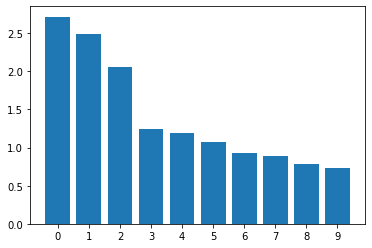

In [207]:
plt.bar(range(0,10), pca.explained_variance_)
plt.xticks(range(0,10))
plt.show()

In [231]:
X_train = X_train[:,rfe.support_]
X_test = X_test[:,rfe.support_]

## Logistic Regression  + Grid Search

In [234]:
def cross_validation_best_parameters(model, param_grid):
  grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
  X=X_train
  y=y_train
  grid.fit(X,y)
  return grid.best_score_,grid.best_estimator_

In [236]:
logreg = LogisticRegression(random_state=0)
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
Best_Accuracy, Best_classifier =cross_validation_best_parameters(logreg,param_grid)
print("Best accuracy is "+ str(Best_Accuracy))
print(Best_classifier)

Best accuracy is 0.8044318181818181
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [240]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
  fpr, tpr, _ = roc_curve(truth,pred)
  roc_auc = auc(fpr, tpr)
  lw = 2
  c = (np.random.rand(), np.random.rand(), np.random.rand())
  plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curve') #Receiver Operating Characteristic
  plt.legend(loc="lower right")

In [241]:
import numpy as np

clf_LR = LogisticRegression(C=Best_classifier.C)
clf_LR.fit(X_train,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.


Logistic regression accuracy is  0.7940909090909091


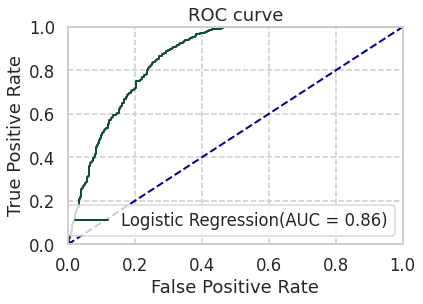

In [242]:
LR_Predict = clf_LR.predict_proba(X_test)[:,1]
LR_Predict_bin = clf_LR.predict(X_test)
LR_Accuracy = accuracy_score(y_test,LR_Predict.round())
print("Logistic regression accuracy is ",LR_Accuracy)
plotAUC(y_test,LR_Predict,'Logistic Regression')
plt.show()

In [243]:
from sklearn.neural_network import MLPClassifier

clf_NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

clf_NN.fit(X_train,y_train)
predict_NN = clf_NN.predict(X_test)
predictproba_NN = clf_NN.predict_proba(X_test)[:,1]
NNAccuracy = accuracy_score(y_test,predict_NN)
print(NNAccuracy)


0.7945454545454546


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


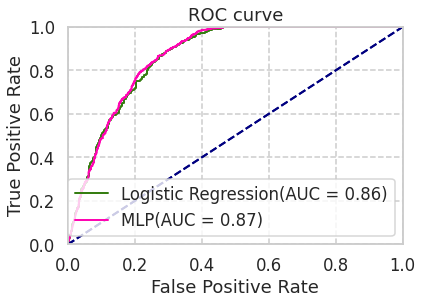

In [246]:
plotAUC(y_test,LR_Predict,'Logistic Regression')
plotAUC(y_test,predictproba_NN,'MLP')
plt.show()


In [ ]:
from sklearn.ensemble  import RandomForestClassifier
from sklearn.model_selection  import RandomizedSearchCV
rf = RandomForestClassifier(criterion='gini', random_state=0)

maxFeatures = range(1,11)
param_dist = dict(max_features=maxFeatures)

rand = RandomizedSearchCV(rf, param_dist, cv=10, scoring='accuracy', n_iter=len(maxFeatures), random_state=10)
X=X_train
y=y_train
rand.fit(X,y)
mean_scores = [result.mean_validation_score for result in rand.grid_scores_]
#print('Best Accuracy = '+str(rand.best_score_))
print(rand.best_estimator_)